In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import wrangle

In [2]:
# Use our function from wrangle to acquire and prepare our data.
df = wrangle.wrangle_grades()
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100,90,95,96
1,2,98,93,96,95
2,3,85,83,87,87
3,4,83,80,86,85
4,5,93,90,96,97


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   student_id   102 non-null    int64
 1   exam1        102 non-null    int64
 2   exam2        102 non-null    int64
 3   exam3        102 non-null    int64
 4   final_grade  102 non-null    int64
dtypes: int64(5)
memory usage: 4.8 KB


### Continuous variable distributions
### Distribution Plot (Histogram / Displot)

<AxesSubplot:>

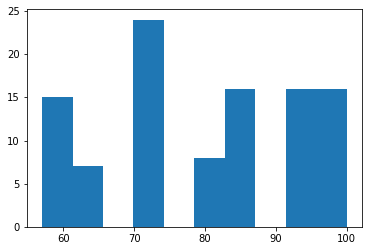

In [4]:
df.exam1.hist(grid=False, bins=10)

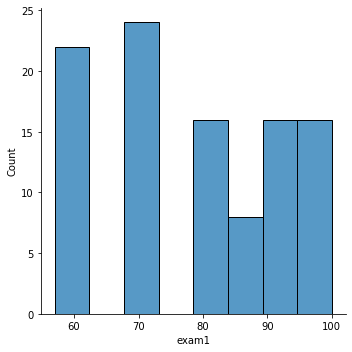

In [5]:

sns.displot(df.exam1)

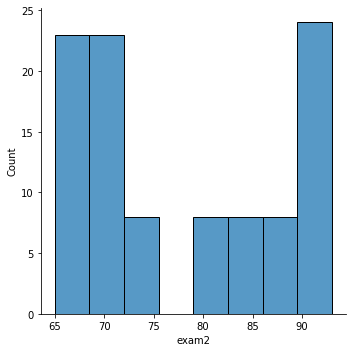

In [6]:
sns.displot(df.exam2)

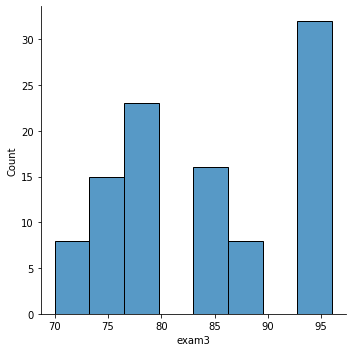

In [7]:
sns.displot(df.exam3)

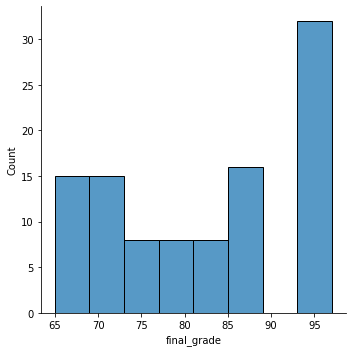

In [8]:
sns.displot(df.final_grade)

# boxplot

<AxesSubplot:xlabel='exam1'>

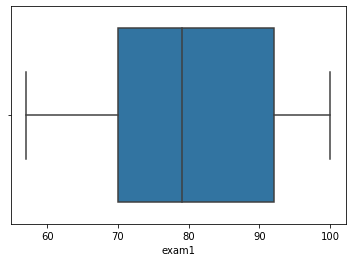

In [9]:
sns.boxplot(df.exam1)

<AxesSubplot:xlabel='exam2'>

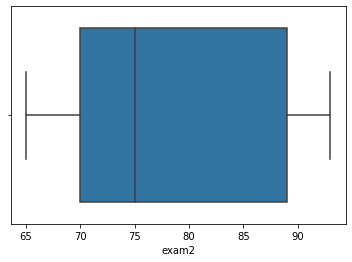

In [10]:
sns.boxplot(df.exam2)

<AxesSubplot:xlabel='exam3'>

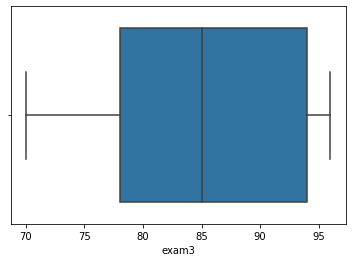

In [11]:
sns.boxplot(df.exam3)

<AxesSubplot:xlabel='final_grade'>

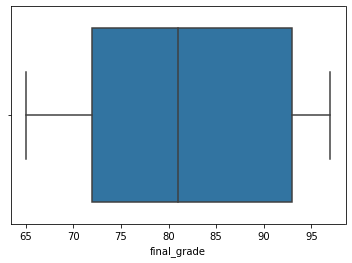

In [12]:
sns.boxplot(df.final_grade)

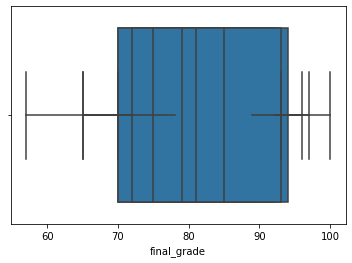

In [13]:

# Repractice it with subplot
cols = [df.exam1, df.exam2, df.exam3, df.final_grade]
for item in cols:
    sns.boxplot(item)

### Countplot

<AxesSubplot:xlabel='exam1', ylabel='count'>

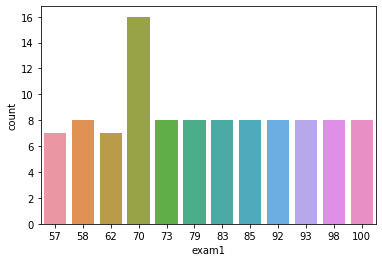

In [14]:
sns.countplot(x="exam1", data=df)

<AxesSubplot:xlabel='exam2', ylabel='count'>

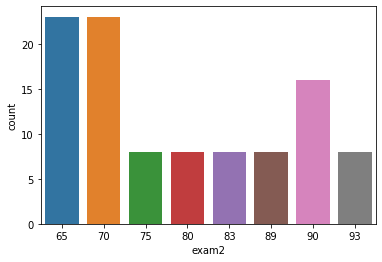

In [15]:
sns.countplot(x="exam2", data=df)

<AxesSubplot:xlabel='exam3', ylabel='count'>

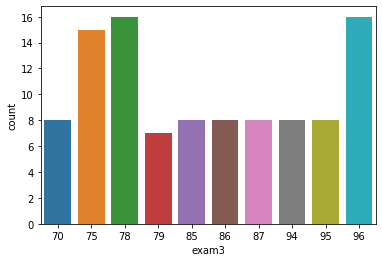

In [16]:
sns.countplot(x="exam3", data=df)

<AxesSubplot:xlabel='final_grade', ylabel='count'>

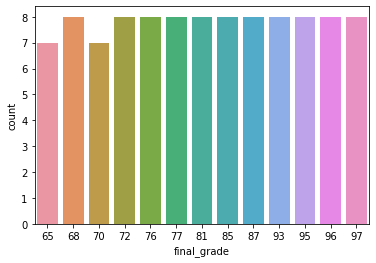

In [17]:
sns.countplot(x="final_grade", data=df)

### Split Data

Before we explore bi- and multi-variate relationships, we must split our data to avoid leakage of unseen data.

In [18]:
# Split into train, validate, and test sets; notice that we are keeping X and Y together so far.

train, validate, test = wrangle.split_continuous(df)

In [19]:
train.shape, validate.shape, test.shape

((56, 5), (25, 5), (21, 5))

### Further visualization

In [20]:
# Create the correlation matrix for all exams.

exam_corr = train.drop(columns=['student_id']).corr()
exam_corr

,exam1,exam2,exam3,final_grade
exam1,1.000000,0.933110,0.940733,0.986033
exam2,0.933110,1.000000,0.937750,0.930982
exam3,0.940733,0.937750,1.000000,0.949790
final_grade,0.986033,0.930982,0.949790,1.000000


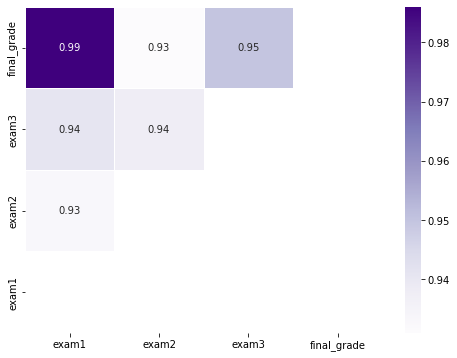

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(exam_corr, cmap='Purples', annot=True, linewidth=0.5, mask= np.triu(exam_corr))
plt.ylim(0, 4)

plt.show()

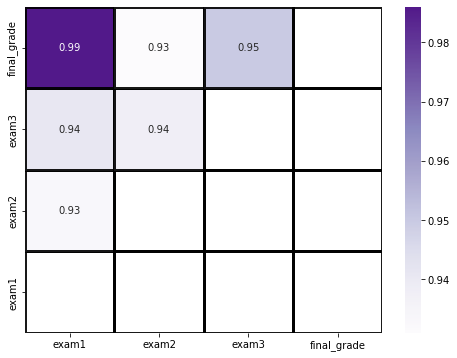

In [24]:
# Pass my correlation matrix to Seaborn's heatmap.

kwargs = {'alpha':.9,'linewidth':3, 'linestyle':'-', 
          'linecolor':'k','rasterized':False, 'edgecolor':'w', 
          'capstyle':'projecting',}

plt.figure(figsize=(8,6))
sns.heatmap(exam_corr, cmap='Purples', annot=True, mask= np.triu(exam_corr), **kwargs)
plt.ylim(0, 4)

plt.show()

In [25]:
r, p_value = pearsonr(train.exam1, train.final_grade)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.9860332649385697
P-value: 1.006510436697437e-43


In [26]:
# Since my variables are not normally distributed, I might choose Spearman instead.

exam_spearman = train.drop(columns=['student_id']).corr(method='spearman')
exam_spearman

,exam1,exam2,exam3,final_grade
exam1,1.000000,0.940463,0.918660,0.987083
exam2,0.940463,1.000000,0.929203,0.910915
exam3,0.918660,0.929203,1.000000,0.930853
final_grade,0.987083,0.910915,0.930853,1.000000


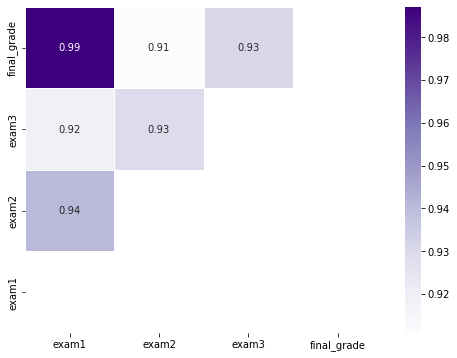

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(exam_spearman, cmap='Purples', annot=True, linewidth=0.5, mask= np.triu(exam_corr))
plt.ylim(0, 4)

plt.show()

In [28]:
# Use a scipy stats function spearmanr to calculate the correlation coefficient and the p-value.

r, p_value = spearmanr(train.exam1, train.final_grade)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.9870830318356753
P-value: 1.2369246014330318e-44


### relplot

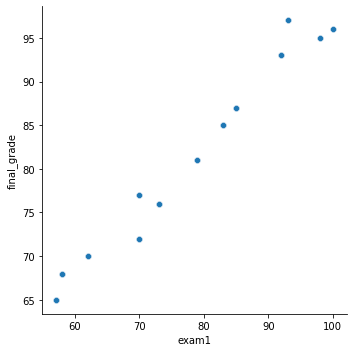

In [29]:
sns.relplot(x="exam1", y="final_grade", data=train)
plt.show()

### lmplot

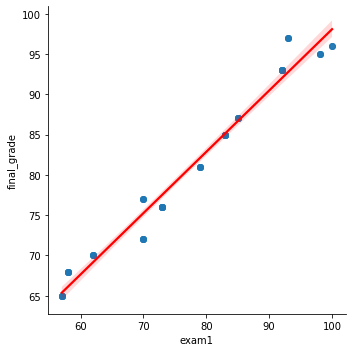

In [30]:
# I can really pop that line color if I want.

sns.lmplot(x="exam1", y="final_grade", data=train, line_kws={'color': 'red'})
plt.show()

### jointplot

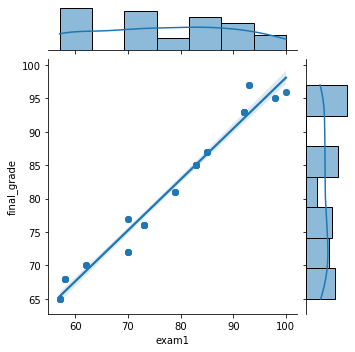

In [31]:
sns.jointplot(x="exam1", y="final_grade", data=train,  kind='reg', height=5)
plt.show()

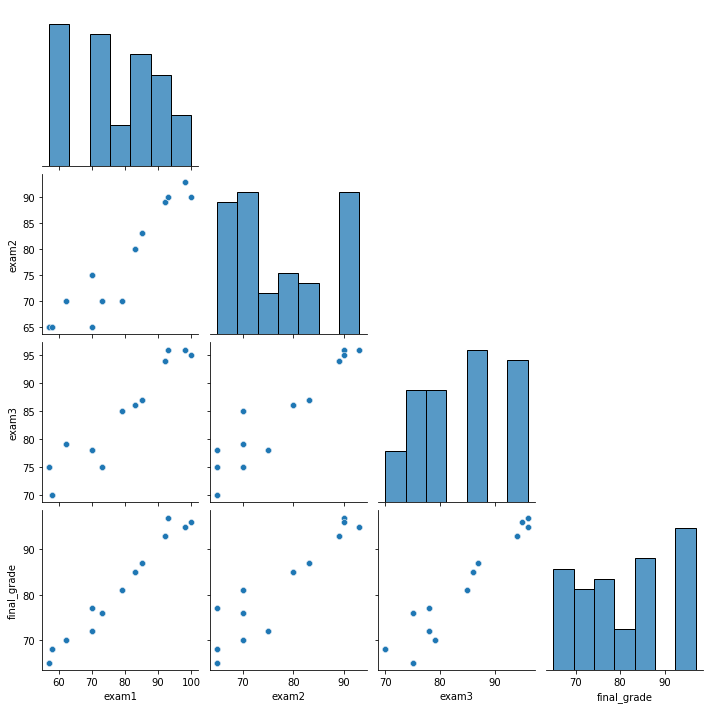

In [32]:
# We can drop the redundant information in the upper right half of the chart if we like.

sns.pairplot(train[['exam1', 'exam2', 'exam3', 'final_grade']], corner=True)
plt.show()